In [4]:
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt
import ipywidgets as widgets
import traitlets
import pandas as pd
import numpy as np
import re
import bqplot
from bqplot import (
    OrdinalScale, LinearScale, Bars, Lines, Axis, Figure
)
from wordcloud import WordCloud, STOPWORDS


In [5]:
data = pd.read_csv("movie_sample.csv", sep=None)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [6]:
data

,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime,reviewTime,helpful1,helpful2
0,AV6QDP8Q0ONK4,B001AYWY9K,"The Movie Guy ""Movies from A to Z""",** Early plot spoilers**I am not a fan of Tim ...,2,THE SOUND OF ONE HAND CLAPPING,1288137600,"10 27, 2010",1,1
1,A1M4NJYP0WNL8Q,B0000D9BEB,"Marc Ruby&#8482; ""The Noh Hare&#8482;""",This is the second DVD in a series that is pro...,5,Angels and Devils,1071878400,"12 20, 2003",9,10
2,A100RW34WSLTUW,B004K4FUUC,Jesse Beitz,Wonderful series that reminds me of the Elizab...,5,Like Elizabeth Gaskill,1393632000,"03 1, 2014",0,0
3,AQZ0K4JCHIHBV,630336473X,Kristin Rattigan,This sounds like a more modern movie and many ...,3,Our Little Girl-we don't care about her,997574400,"08 12, 2001",7,9
4,A1GKTHLZOWBLKL,B005LAIIMG,Cidney Webster,Let's get one thing straight: this is not a zo...,3,Perfect Popcorn for Prime,1402704000,"06 14, 2014",1,2
5,A3EHYVC35E5WRG,B002ZG9864,Valmina,Cute movie. Really funny. Tom and Cameron are ...,5,Fun Movie,1378857600,"09 11, 2013",0,0
6,A30X6EFTCNAJ7C,B002AMW108,"Dbzgirl ""Rosie""","I've watched most of the episodes of ""Flapjack...",3,"""The Marvelous Misadventures of Flapjack"" DVD",1247702400,"07 16, 2009",2,82
7,A3KF4IP2MUS8QQ,B001VC99HG,"Daniel Jolley ""darkgenius""",Come on down to Florida for some good old-fash...,4,A highly predictable yet entertaining film wit...,1313193600,"08 13, 2011",0,0
8,A2Z2MUZ76N5EY7,B0000AUHOD,James E. Carroll,Albert Finney's portrayal of retiring classics...,4,A Superb Film,1074038400,"01 14, 2004",31,31
9,AFLVXJNQLBTXW,630264187X,Ayrton Roberto Pastore,I am collector of moviesThe master Bergman sho...,5,delivery went smoothly,1382572800,"10 24, 2013",0,0


In [8]:
df = pd.DataFrame(data.reviewTime.str.split(',',2).tolist(),
                                   columns = ['Day/Month','year'])
data["year"] = df["year"]

In [5]:
def getWords(text):
    return re.compile('\w+').findall(text)

test = getWords(data["reviewText"].to_string())

from collections import Counter

wordcount = Counter(test)

#wordcount.most_common(10)



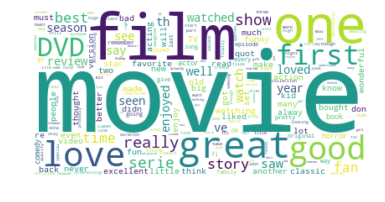

In [24]:
kam = ' '.join(test)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(collocations=False, background_color="white", max_font_size=200, stopwords=stopwords).generate(kam)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [31]:
#you mighy have to run this cell because it doesnt automaticaly display upon saved
widget = widgets.Dropdown(
    options=list(data['year'].unique()),
    value=' 2000',
    description='Year:',
    disabled=False,
)
t = data.groupby("overall")["year"]


x_data = data.overall.unique()
y_data = t.value_counts()
x_ord = OrdinalScale()
y_sc = LinearScale()
t = data.groupby("year")["overall"].value_counts()

bar = Bars(x=x_data, y=y_data, scales={'x': x_ord, 'y':
y_sc}, type='stacked')

ax_x = Axis(scale=x_ord, grid_lines='solid', label='Overal')
ax_y = Axis(scale=y_sc, orientation='vertical', tick_format='0.2f',
            grid_lines='solid', label='Count')

kame = Figure(marks=[bar], axes=[ax_x, ax_y], title='Reviews',
       legend_location='bottom-right')


def update_histogram(event):
    int(event['new'])
    bar.x = data.overall.unique()
    bar.y = t[event['new']].unique()




widget.observe(update_histogram, "value")

display(widget,kame)

Dropdown(description='Year:', index=13, options=(' 2010', ' 2003', ' 2014', ' 2001', ' 2013', ' 2009', ' 2011', ' 2004', ' 2002', ' 2008', ' 2006', ' 2007', ' 2012', ' 2000', ' 2005', ' 1999', ' 1998'), value=' 2000')

Figure(axes=[Axis(label='Overal', scale=OrdinalScale()), Axis(label='Count', orientation='vertical', scale=LinearScale(), tick_format='0.2f')], fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(min_width='125px'), legend_location='bottom-right', marks=[Bars(colors=['steelblue'], interactions={'hover': 'tooltip'}, scales={'x': OrdinalScale(), 'y': LinearScale()}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}}, tooltip_style={'opacity': 0.9}, x=array([2, 5, 3, 4, 1]), y=array([ 528,  356,  297,  241,  233,  214,  202,  195,  191,  166,  159,
        101,   90,   77,   49,    9,  492,  336,  272,  205,  200,  199,
        195,  187,  176,  173,  144,  113,   94,   93,   79,   15,    1,
       1188,  734,  518,  402,  387,  376,  358,  356,  337,  334,  281,
        208,  195,  162,  114,   22,    3, 2272, 1448,  982,  715,  670,
        665,  641,  630,  628,  586,  532,  416,  380,  296,  228,   38,
       6857, 4274, 2673, 1486, 1396, 1388, 1385, 1314, 1232, 1212, 1011,
        787,  670,  529,  497,   97,    8]))], scale_x=LinearScale(allow_padding=False, max=1.0, min=0.0), scale_y=LinearScale(allow_padding=False, max=1.0, min=0.0), title='Reviews')

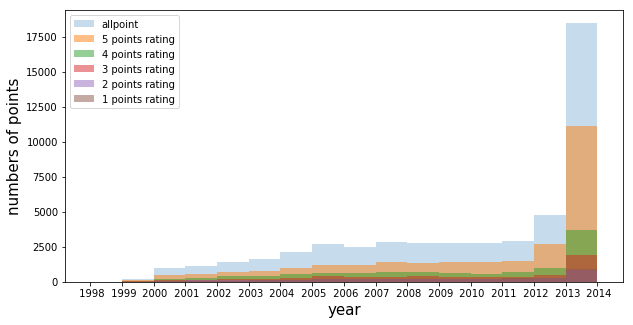

In [18]:
def filter_by_point(data, point):
    point_array = np.array([point]) == np.array(data["overall"])
    return point_array

allpoint = data["year"]
point1 = data["year"][filter_by_point(data, 1)]
point2 = data["year"][filter_by_point(data, 2)]
point3 = data["year"][filter_by_point(data, 3)]
point4 = data["year"][filter_by_point(data, 4)]
point5 = data["year"][filter_by_point(data, 5)]

plt.figure(figsize=(10,5))


plt.hist(allpoint,bins=16, alpha=0.25,label="allpoint")
plt.hist(point5,bins=16,alpha=0.5,label="5 points rating")
plt.hist(point4, bins=15, alpha=0.5,label="4 points rating")
plt.hist(point3, bins=16,alpha=0.5,label="3 points rating")
plt.hist(point2, bins=16,alpha=0.5,label="2 points rating")
plt.hist(point1, bins=15,alpha=0.5,label="1 points rating")

plt.xlabel("year",fontsize=15)
plt.ylabel("numbers of points",fontsize=15)


plt.legend()
plt.show()

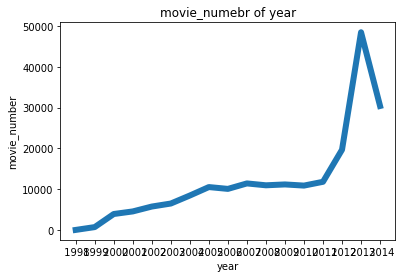

In [20]:
m = data.groupby("year")["overall"].sum()
x = m.index
y = m
plt.title('movie_numebr of year')
plt.xlabel("year")
plt.ylabel("movie_number")
plt.plot(x,y,linewidth = 6)

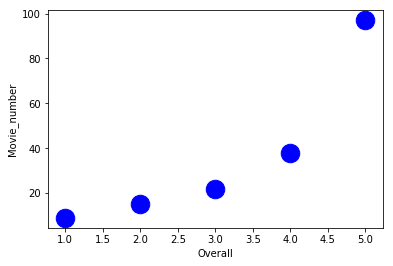

In [40]:
from collections import Counter

df2 = data.groupby("year")
widgets.interact(yr = [i for i in range(1998,2014)])
def draw_movie_number(yr):
    t = df2.get_group(' %s' % yr)
    c = Counter(t["overall"])
    it = c.items()
    key = [i[0] for i in it]
    value = [i[1] for i in it]
    plt.xlabel("Overall")
    plt.ylabel("Movie_number")
    size = 2**2
    plt.scatter(key,value,s = 7**3,color = 'blue')

draw_movie_number(1999)